In [219]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import variation, f_oneway, kruskal, shapiro
from statistics import mean, median

In [220]:
root_dir = os.path.dirname(os.getcwd())
df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))

/tmp/ipykernel_1925/2404526448.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root_dir, "data/processed/data_cleaned.csv"))


In [221]:
df.head(10)

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,altitude,pressure,control,session
0,T001,NaN,NaN,R,1493,9752,2098403,1,1970-01-01 12:34:58.403000,1990,720,6,N,u00005s00001_hw00001.svc
1,T001,NaN,NaN,R,1490,9752,2098411,1,1970-01-01 12:34:58.411000,1990,720,168,N,u00005s00001_hw00001.svc
2,T001,NaN,NaN,R,1490,9752,2098418,1,1970-01-01 12:34:58.418000,1990,720,328,N,u00005s00001_hw00001.svc
3,T001,NaN,NaN,R,1490,9752,2098426,1,1970-01-01 12:34:58.426000,1990,720,480,N,u00005s00001_hw00001.svc
4,T001,NaN,NaN,R,1489,9752,2098433,1,1970-01-01 12:34:58.433000,1990,720,667,N,u00005s00001_hw00001.svc
5,T001,NaN,NaN,R,1489,9752,2098441,1,1970-01-01 12:34:58.441000,1990,720,791,N,u00005s00001_hw00001.svc
6,T001,NaN,NaN,R,1489,9752,2098448,1,1970-01-01 12:34:58.448000,2020,720,889,N,u00005s00001_hw00001.svc
7,T001,NaN,NaN,R,1489,9752,2098456,1,1970-01-01 12:34:58.456000,2020,720,967,N,u00005s00001_hw00001.svc
8,T001,NaN,NaN,R,1489,9752,2098463,1,1970-01-01 12:34:58.463000,2020,720,1031,N,u00005s00001_hw00001.svc
9,T001,NaN,NaN,R,1488,9752,2098471,1,1970-01-01 12:34:58.471000,2020,720,1065,N,u00005s00001_hw00001.svc


In [222]:
df.describe()

,age,x_coordinate,y_coordinate,timestamp,state,azimuth,altitude,pressure
count,51060.000000,250802.000000,250802.000000,2.508020e+05,250802.000000,250802.000000,250802.000000,250802.000000
mean,42.698394,3836.949331,6376.095613,1.222163e+11,0.806258,1218.043197,673.766995,958.260943
std,13.403745,1890.954648,2679.231170,3.871606e+11,0.395230,1000.303596,134.801812,620.309786
min,22.000000,59.000000,1399.000000,1.264550e+05,0.000000,0.000000,220.000000,0.000000
25%,32.000000,1770.000000,3820.000000,1.777883e+06,1.000000,340.000000,570.000000,488.000000
50%,48.000000,4592.000000,6797.000000,2.633750e+06,1.000000,940.000000,690.000000,1067.000000
75%,52.000000,5411.000000,8593.000000,5.482293e+06,1.000000,1900.000000,770.000000,1369.000000
max,62.000000,7198.000000,12317.000000,1.363796e+12,1.000000,3590.000000,900.000000,2048.000000


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject       250802 non-null  object 
 1   gender        51060 non-null   object 
 2   age           51060 non-null   float64
 3   hand          250802 non-null  object 
 4   x_coordinate  250802 non-null  int64  
 5   y_coordinate  250802 non-null  int64  
 6   timestamp     250802 non-null  int64  
 7   state         250802 non-null  int64  
 8   date          250802 non-null  object 
 9   azimuth       250802 non-null  int64  
 10  altitude      250802 non-null  int64  
 11  pressure      250802 non-null  int64  
 12  control       250802 non-null  object 
 13  session       250802 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 26.8+ MB


In [224]:
unique_subjects = df['subject'].drop_duplicates()

# Total number of unique subjects
num_subjects = unique_subjects.nunique()

# Number of healthy subjects (control == 'Y')
healthy_subjects = df[df['control'] == 'Y']['subject'].drop_duplicates().nunique()

# Number of sick subjects (control == 'N')
sick_subjects = df[df['control'] == 'N']['subject'].drop_duplicates().nunique()

print(f"Total number of unique subjects: {num_subjects}")
print(f"Number of healthy subjects: {healthy_subjects}")
print(f"Number of PD subjects: {sick_subjects}")

Total number of unique subjects: 32
Number of healthy subjects: 10
Number of PD subjects: 22


In [225]:
# All sessions
len(list(df['session'].unique()))

108

In [226]:
# Number of sessions for healthy subjects (control == 'Y')
healthy_sessions = df[df['control'] == 'Y']['session'].nunique()

# Number of sessions for sick subjects (control == 'N')
sick_sessions = df[df['control'] == 'N']['session'].nunique()

# Print the results
print(f"Number of sessions for the healthy subjects: {healthy_sessions}")
print(f"Number of sessions for the PD subjects: {sick_sessions}")

Number of sessions for the healthy subjects: 20
Number of sessions for the PD subjects: 90


In [227]:
for subject in unique_subjects:
    sessions = df[df.subject == subject].session.unique()
    print(
        f"Subject {subject} has {len(sessions)} sessions with {[len(df[(df.session == session) & (df.subject == subject)]) for session in sessions]} records each session."
    )

Subject T001 has 4 sessions with [2643, 597, 2465, 2974] records each session.
Subject T002 has 5 sessions with [688, 1828, 8952, 1735, 428] records each session.
Subject T005 has 2 sessions with [4561, 2098] records each session.
Subject T006 has 4 sessions with [1959, 978, 196, 619] records each session.
Subject T007 has 5 sessions with [434, 1218, 354, 1552, 1216] records each session.
Subject T008 has 5 sessions with [175, 1301, 139, 1121, 1980] records each session.
Subject T009 has 5 sessions with [1412, 171, 192, 1375, 899] records each session.
Subject T010 has 5 sessions with [1277, 282, 1271, 198, 832] records each session.
Subject T011 has 5 sessions with [1577, 636, 1736, 389, 1414] records each session.
Subject T012 has 5 sessions with [1834, 396, 1793, 1960, 368] records each session.
Subject T013 has 5 sessions with [461, 3733, 1912, 2873, 1370] records each session.
Subject T014 has 5 sessions with [2127, 3405, 296, 2127, 256] records each session.
Subject T015 has 5 se

In [228]:
control_subjects = df[(df.control == 'Y')]['subject'].unique()
noncontrol_subjects = df[(df.control == 'N')]['subject'].unique()
control_sessions = []
noncontrol_sessions = []
for c in control_subjects:
    sessions = len(df[(df.control == 'Y') & (df.subject == c)]['session'].unique())
    control_sessions.append(sessions)
for c in noncontrol_subjects:
    sessions = len(df[(df.control == 'N') & (df.subject == c)]['session'].unique())
    noncontrol_sessions.append(sessions)
print(f"There are {median(control_sessions)} median sessions for control and {median(noncontrol_sessions)} median sessions for non-control in this dataset")

There are 2.0 median sessions for control and 5.0 median sessions for non-control in this dataset


In [229]:
for feature in df.select_dtypes(include=[np.number, object]).columns:
    # Check for missing, zero, or empty values
    missing_count = len(df[df[feature].isin(["", "0", 0, pd.NA, " ", np.nan])])
    print(f"{feature.capitalize()} has {missing_count} missing or zero values")

Subject has 0 missing or zero values
Gender has 199742 missing or zero values
Age has 199742 missing or zero values
Hand has 0 missing or zero values
X_coordinate has 0 missing or zero values
Y_coordinate has 0 missing or zero values
Timestamp has 0 missing or zero values
State has 48591 missing or zero values
Date has 0 missing or zero values
Azimuth has 27385 missing or zero values
Altitude has 0 missing or zero values
Pressure has 48591 missing or zero values
Control has 0 missing or zero values
Session has 0 missing or zero values


In [230]:
df["x_coordinate"].isna().sum(), df["y_coordinate"].isna().sum()

(0, 0)

In [231]:
len(df[(df["altitude"] == 0) & (df["azimuth"] == 0) & (df["pressure"] == 0)])

0

In [232]:
len(df[(df["state"] == 0) & (df["pressure"] != 0)])

0

In [233]:
missing_no = df.isnull().sum()
missing_no = missing_no[missing_no > 0]
print(f"There are {len(missing_no)} variables which contain an X number of missing (NaN or Null) values: \n{missing_no.to_string()}")

There are 2 variables which contain an X number of missing (NaN or Null) values: 
gender    199742
age       199742


In [234]:
for var, num in missing_no.items():
    total_no = len(df[f"{var}"])
    percent = (num / total_no) * 100
    print(f"{var}\t{round(percent,2)}%".expandtabs(15))

gender         79.64%
age            79.64%


In [235]:
filtered_data = df[(df['x_coordinate'] == 0) & (df['y_coordinate'] == 0)]
grouped_data = filtered_data.groupby(['subject', 'session']).size()
print(f"There are {len(grouped_data)} sessions that have spirals positioned at (0,0)")

There are 0 sessions that have spirals positioned at (0,0)


In [236]:
df['x_coordinate'] = pd.to_numeric(df['x_coordinate'], errors='coerce')
df['y_coordinate'] = pd.to_numeric(df['y_coordinate'], errors='coerce')
df["date"] = pd.to_datetime(df["date"])
df["timestamp"] = df["date"].dt.time.astype(str)


In [237]:
def create_metrics(df):
    df_temp = df.copy()
    grouping_vars = ['subject','session']
    df_temp["dx"] = df_temp.groupby(grouping_vars)["x_coordinate"].diff()
    df_temp["dy"] = df_temp.groupby(grouping_vars)["y_coordinate"].diff()
    df_temp["delta_altitude"] = df_temp.groupby(grouping_vars)["altitude"].diff().abs()
    df_temp["delta_pressure"] = df_temp.groupby(grouping_vars)["pressure"].diff().abs()
    df_temp["delta_azimuth"] = df_temp.groupby(grouping_vars)["azimuth"].diff().abs()
    # Calculate the delta distance as the Euclidean distance for each group
    df_temp["distance"] = np.sqrt(df_temp["dx"] ** 2 + df_temp["dy"] ** 2)
    # Compute time difference in seconds
    df_temp["dt"] = pd.to_datetime(df_temp["date"]).diff().dt.total_seconds()
    # Calculate speed
    df_temp["speed"] = df_temp["distance"] / df_temp["dt"]
    return df_temp
df = create_metrics(df)
# Convert the class to numeric (0 for non-control, 1 for control)
df["control_numeric"] = (df["control"] == "N").astype(int)
df.head()

,subject,gender,age,hand,x_coordinate,y_coordinate,timestamp,state,date,azimuth,...,session,dx,dy,delta_altitude,delta_pressure,delta_azimuth,distance,dt,speed,control_numeric
0,T001,NaN,NaN,R,1493,9752,12:34:58.403000,1,1970-01-01 12:34:58.403,1990,...,u00005s00001_hw00001.svc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,T001,NaN,NaN,R,1490,9752,12:34:58.411000,1,1970-01-01 12:34:58.411,1990,...,u00005s00001_hw00001.svc,-3.0,0.0,0.0,162.0,0.0,3.0,0.008,375.000000,1
2,T001,NaN,NaN,R,1490,9752,12:34:58.418000,1,1970-01-01 12:34:58.418,1990,...,u00005s00001_hw00001.svc,0.0,0.0,0.0,160.0,0.0,0.0,0.007,0.000000,1
3,T001,NaN,NaN,R,1490,9752,12:34:58.426000,1,1970-01-01 12:34:58.426,1990,...,u00005s00001_hw00001.svc,0.0,0.0,0.0,152.0,0.0,0.0,0.008,0.000000,1
4,T001,NaN,NaN,R,1489,9752,12:34:58.433000,1,1970-01-01 12:34:58.433,1990,...,u00005s00001_hw00001.svc,-1.0,0.0,0.0,187.0,0.0,1.0,0.007,142.857143,1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250802 entries, 0 to 250801
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   subject          250802 non-null  object        
 1   gender           51060 non-null   object        
 2   age              51060 non-null   float64       
 3   hand             250802 non-null  object        
 4   x_coordinate     250802 non-null  int64         
 5   y_coordinate     250802 non-null  int64         
 6   timestamp        250802 non-null  object        
 7   state            250802 non-null  int64         
 8   date             250802 non-null  datetime64[ns]
 9   azimuth          250802 non-null  int64         
 10  altitude         250802 non-null  int64         
 11  pressure         250802 non-null  int64         
 12  control          250802 non-null  object        
 13  session          250802 non-null  object        
 14  dx               250

In [239]:
def aggregate_features(df_input):
    variability_data = []
    # Iterate over subjects
    for subject in df_input.subject.unique():
        subject_df = df_input[df_input.subject == subject]
        # Iterate over sessions for each subject
        for session in subject_df.session.unique():
            session_df = subject_df[
                (subject_df.session == session) & (subject_df.subject == subject)
            ]
            # Calculate variability (coefficient of variation) for speed
            speed_variability = variation(session_df["speed"].dropna())
            
            # Collect the information (session, subject, and speed variability)
            variability_data.append({
                "subject": subject,
                "session": session,
                "speed_variability": speed_variability
            })

    # Convert the variability data into a DataFrame
    variability_df = pd.DataFrame(variability_data)
    # Group by subject, session, and control, and calculate mean values for other features
    mean_df = df_input.groupby(['subject','session','control']).agg({
        "altitude":'mean',
        "pressure":'mean',
        "azimuth":'mean',        
        "delta_altitude":'mean',
        "delta_pressure":'mean',
        "delta_azimuth":'mean',
        "distance":'mean',
        "speed":'mean',
    }).reset_index()

    # Merge the variability_df with mean_df on subject and session
    merged_df = pd.merge(mean_df, variability_df, on=["subject", "session"], how="left")
    return merged_df
df_metrics = aggregate_features(df)
numerical_features = df_metrics.select_dtypes(include=[np.number]).columns
df_metrics["control_numeric"] = (df_metrics["control"] == "N").astype(int)
df_metrics.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,9.776798,1306.601579,0.353673,0
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,9.048493,1209.206531,0.328152,0
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,10.610512,1418.329782,0.307090,0
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,8.877929,1186.444942,0.384199,0
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,8.461535,1130.810308,0.283591,0


In [240]:
# Split the dataset into all controlled and non control patients
controlled = df.loc[df['control'] == 'Y']
noncontrolled = df.loc[df['control'] == 'N']

In [241]:
control_df= df[(df.subject == "C01") & (df.session == "u00003s00002_hw000011.svc")].reset_index(drop=True)
non_control_df = df[(df.subject == "T001") & (df.session == "u00005s00001_hw00001.svc")].reset_index(drop=True)

In [242]:
def plot_drawing(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x_coordinate'], df['y_coordinate'], s=2)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Handwritten Spirals')
    plt.show()

PLot a sample drawing for a control patient

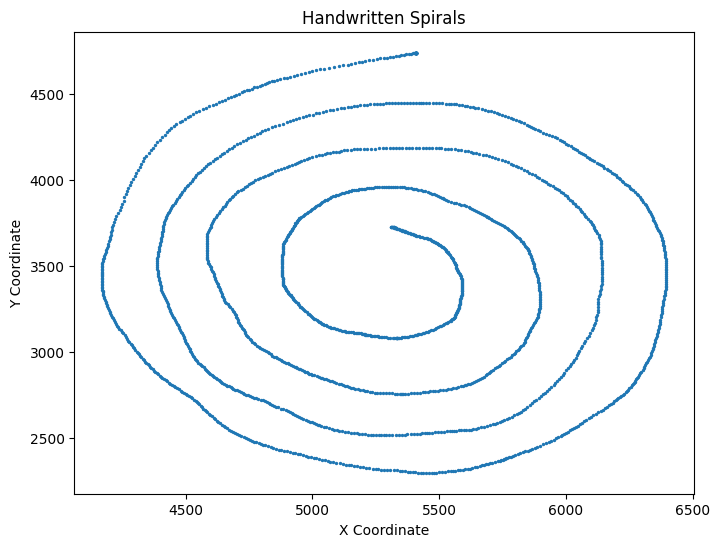

In [243]:
plot_drawing(control_df)

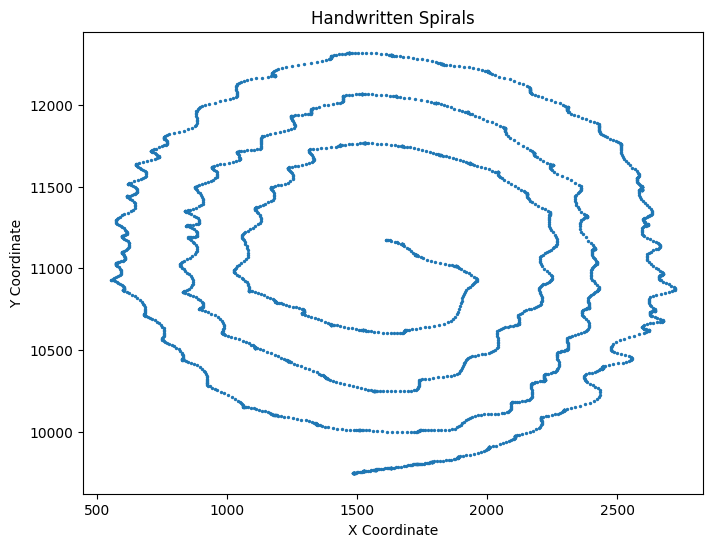

In [244]:
plot_drawing(non_control_df)

# Delta features

In [245]:
# Calculating the difference of altitude between the coordinates for the specified sessions
def plot_delta_altitude(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    time_step = np.arange(len(df["delta_altitude"]))
    plt.plot(time_step, df["delta_altitude"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta altitude')
    plt.title(f'Delta altitude over time by session')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()

# Calculating the difference of azimuth between the coordinates for the specified sessions
def plot_delta_azimuth(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    time_step = np.arange(len(df["delta_azimuth"]))
    plt.plot(time_step, df["delta_azimuth"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta azimuth')
    plt.title(f'Delta azimuth over time by session')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()

# Calculating the difference of pressure between the coordinates for the specified sessions
def plot_delta_pressure(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    time_step = np.arange(len(df["delta_pressure"]))
    plt.plot(time_step, df["delta_pressure"])
    plt.xlabel('Time Step')
    plt.ylabel(f'Delta pressure')
    plt.title(f'Delta pressure over time by session')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tight_layout()


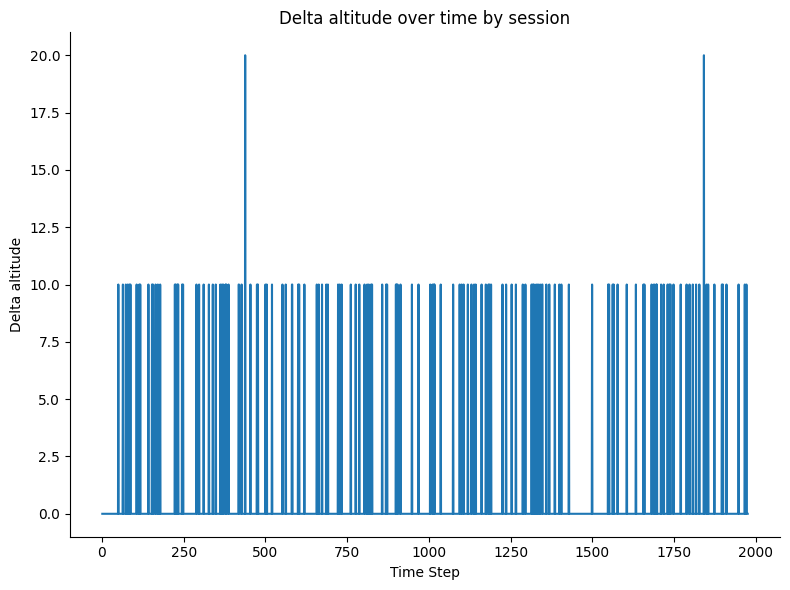

In [246]:
plot_delta_altitude(control_df)

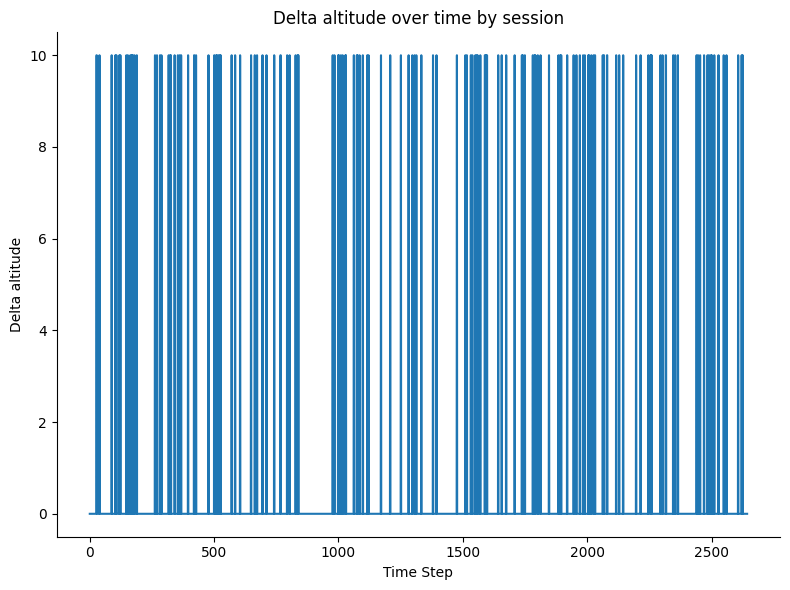

In [247]:
plot_delta_altitude(non_control_df)

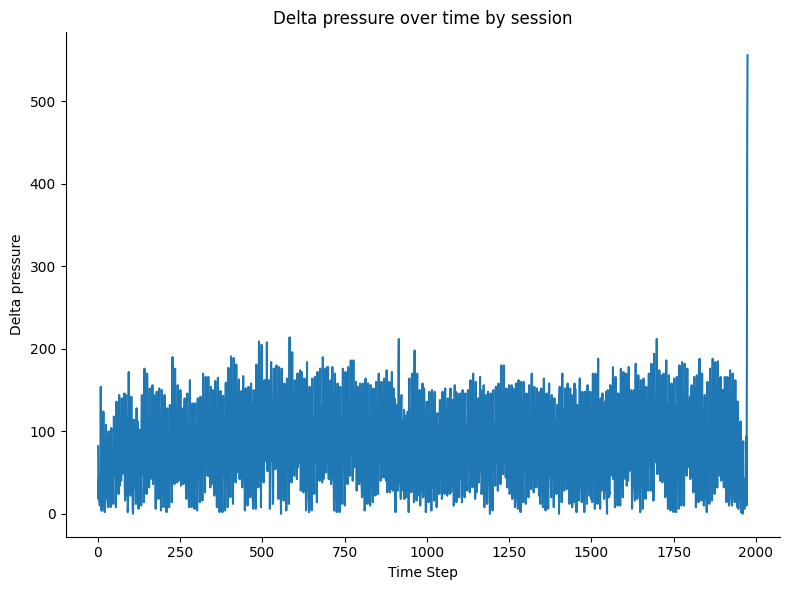

In [248]:
plot_delta_pressure(control_df)

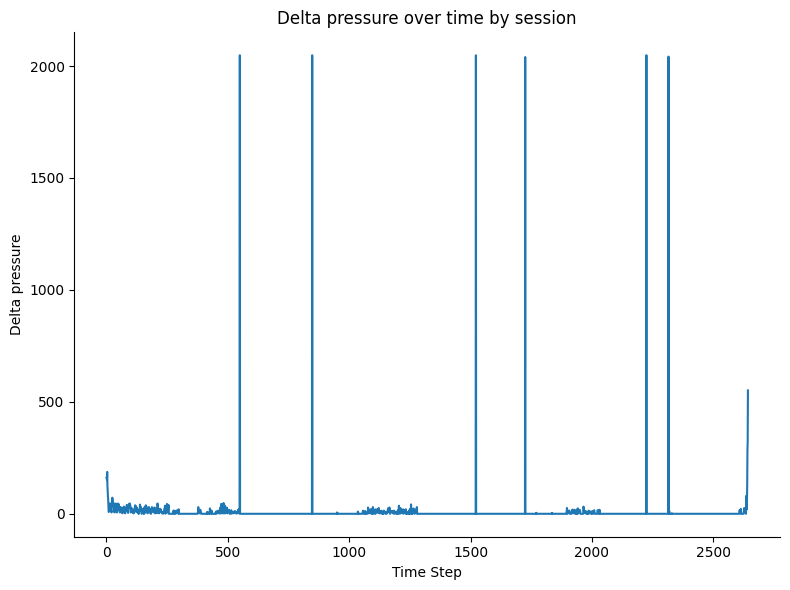

In [249]:
plot_delta_pressure(non_control_df)

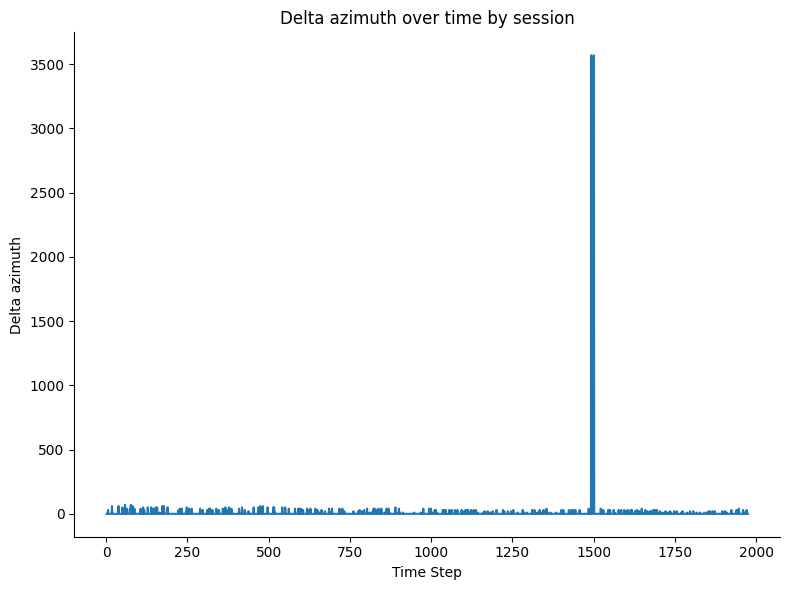

In [250]:
plot_delta_azimuth(control_df)

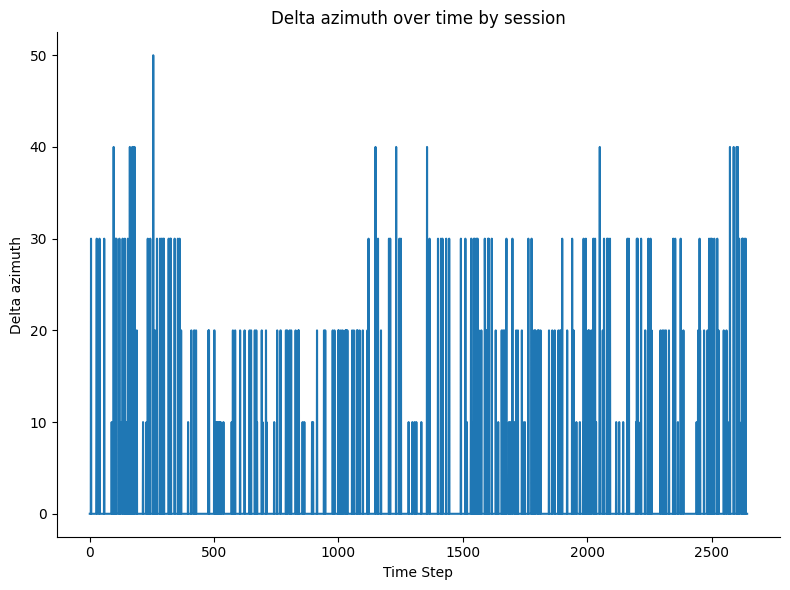

In [251]:
plot_delta_azimuth(non_control_df)

# Drawing Speed

In [252]:
df_metrics.head()

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,9.776798,1306.601579,0.353673,0
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,9.048493,1209.206531,0.328152,0
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,10.610512,1418.329782,0.307090,0
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,8.877929,1186.444942,0.384199,0
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,8.461535,1130.810308,0.283591,0


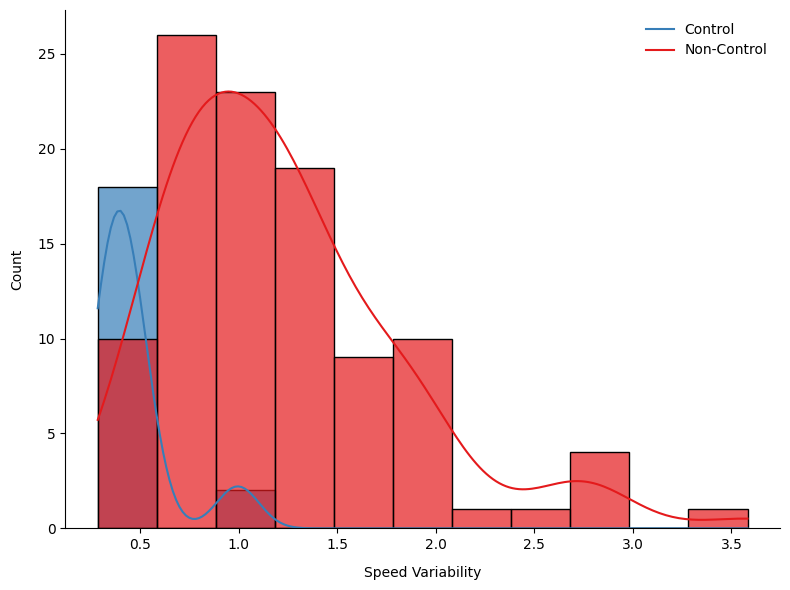

In [253]:
fig, ax = plt.subplots(figsize=(8, 6))
hue_order = [1, 0] 
legend_labels = {0: 'Non-Control', 1: 'Control'}
sns.histplot(df_metrics, x="speed_variability", hue="control_numeric", kde=True, palette="Set1", alpha=0.7,  hue_order=hue_order)
plt.xlabel("Speed Variability", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.legend(labels=[legend_labels[i] for i in hue_order], frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()

In [254]:
print("Mean values for each metric by control group:")
df_metrics.groupby("control")[numerical_features].mean()

Mean values for each metric by control group:


,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability
control,,,,,,,,,
N,688.58668,946.923795,1058.461317,1.032121,20.964926,5.409654,14.317299,1590.861261,1.223911
Y,752.76349,1185.737313,1611.693997,0.828946,44.096586,9.949081,7.903715,1054.804382,0.457247


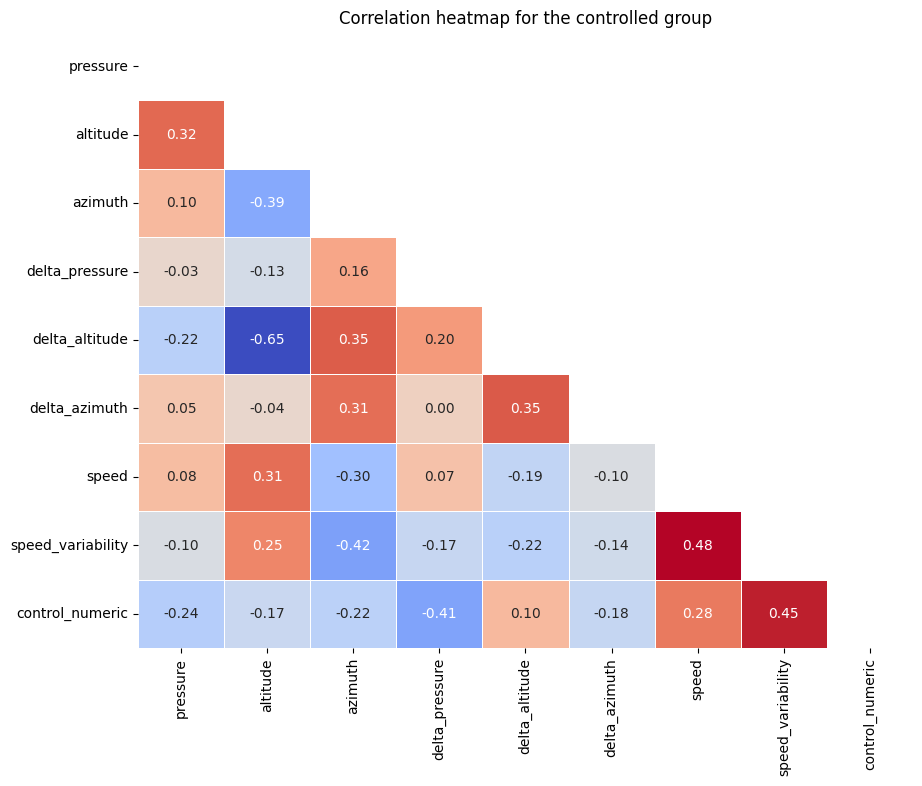

In [255]:
correlation_matrix = df_metrics[["pressure","altitude", "azimuth", "delta_pressure", "delta_altitude", "delta_azimuth", "speed", "speed_variability", "control_numeric"]].copy().corr("pearson")

mask = np.triu(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cbar=False, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            mask=mask)
plt.title("Correlation heatmap for the controlled group");

## Checking the normality for each feature

In [256]:
for feature in numerical_features.tolist():
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[feature].dropna())
    print(f"Feature: {feature}, Shapiro-Wilk Test p-value: {p_value:.4f}")


Feature: altitude, Shapiro-Wilk Test p-value: 0.0000
Feature: pressure, Shapiro-Wilk Test p-value: 0.0000
Feature: azimuth, Shapiro-Wilk Test p-value: 0.0000
Feature: delta_altitude, Shapiro-Wilk Test p-value: 0.0000
Feature: delta_pressure, Shapiro-Wilk Test p-value: 0.0000
Feature: delta_azimuth, Shapiro-Wilk Test p-value: 0.0000
Feature: distance, Shapiro-Wilk Test p-value: 0.0000
Feature: speed, Shapiro-Wilk Test p-value: 0.0000


/home/leongjia1/anaconda3/envs/uni/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


KeyError: 'speed_variability'

## Compute Kruskal Wallis tests

In [181]:
control_group = df_metrics[df_metrics['control'] == 'Y']
uncontrolled_group = df_metrics[df_metrics['control'] == 'N']
control_group.shape, uncontrolled_group.shape

((20, 13), (104, 13))

In [183]:
control_group

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability,control_numeric
0,C01,u00003s00002_hw000011.svc,Y,744.736842,1641.735324,3372.130567,0.779747,84.056203,7.103797,9.776798,1306.601579,0.353673,0
1,C01,u00003s00002_hw000012.svc,Y,817.502444,1003.782991,1941.793744,0.767726,70.984841,7.413203,9.048493,1209.206531,0.328152,0
2,C02,u00004s00001_hw000011.svc,Y,748.940962,1014.970785,3194.357882,0.883069,29.577345,18.666261,10.610512,1418.329782,0.307090,0
3,C02,u00004s00001_hw000012.svc,Y,799.971469,936.285307,1673.128864,1.046622,45.383444,6.308278,8.877929,1186.444942,0.384199,0
4,C03,u00005s00001_hw000011.svc,Y,759.467397,1108.660030,694.639124,0.806773,35.937251,14.203187,8.461535,1130.810308,0.283591,0
5,C03,u00005s00001_hw000012.svc,Y,745.128205,888.637047,1694.580018,0.893410,42.755418,4.462627,7.700355,1029.114672,0.371980,0
6,C04,u00006s00001_hw000011.svc,Y,604.107847,1094.413415,311.836914,0.894737,21.239474,1.855263,7.754116,1033.500468,0.461092,0
7,C04,u00006s00001_hw000012.svc,Y,728.533734,918.837007,1639.368737,0.915469,27.282325,2.639492,5.981860,796.348735,0.456325,0
8,C05,u00007s00001_hw000011.svc,Y,810.330989,1448.352089,3068.729830,0.819536,38.850993,29.379139,7.631128,1019.748454,0.524839,0
9,C05,u00007s00001_hw000012.svc,Y,789.654882,1476.021886,1359.583333,0.875789,37.809263,5.056842,7.719269,1031.454983,0.438721,0


In [184]:
uncontrolled_group

,subject,session,control,altitude,pressure,azimuth,delta_altitude,delta_pressure,delta_azimuth,distance,speed,speed_variability,control_numeric
20,T001,u00005s00001_hw00001.svc,N,707.797957,1519.924707,2098.774120,0.586677,9.126419,2.210447,7.598950,1014.942165,0.732902,1
21,T001,u00005s00001_hw00002.svc,N,489.436105,918.022718,3229.918864,1.213474,19.465909,4.857955,7.219392,944.256211,1.275660,1
22,T001,u00005s00001_hw00004.svc,N,524.539363,1079.907873,3282.026801,2.080537,11.587248,14.563758,10.314650,1300.031384,0.871489,1
23,T001,u00005s00001_hw00005.svc,N,615.131137,1408.683927,2200.672495,1.446350,27.498486,2.845610,7.800682,989.885188,1.255582,1
24,T002,u00006s00001_hw00001.svc,N,755.596542,1648.953314,1214.599424,2.889273,16.762976,24.677047,26.645257,3447.166315,0.756140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,T029,u00022s00001_hw00001.svc,N,657.232902,648.400185,1711.619224,1.813644,5.249769,13.608800,9.711463,1195.905335,2.046900,1
120,T029,u00022s00001_hw00002.svc,N,760.308357,904.490778,216.060519,1.098299,8.162006,7.232632,6.490448,789.768487,0.672470,1
121,T029,u00022s00001_hw00003.svc,N,530.085179,788.383305,2610.647359,0.648464,9.095563,1.296928,9.226697,1230.983240,1.130120,1
122,T029,u00022s00001_hw00004.svc,N,602.069364,442.707514,2008.878613,1.076389,6.415509,50.925926,6.999736,933.687250,0.810143,1


In [ ]:
for feature in numerical_features.tolist():
    kruskal(control_group["delta_altitude"],uncontrolled_group["delta_altitude"])

KruskalResult(statistic=0.3977844187662237, pvalue=0.5282356990979993)